<h1> Lab 3</h1>
<h3> W203 Statistics for Data Science </h3>

Author Names: Jake Mitchell, Rishikesh Majumder, Tej Singh

Section Number: Fall_Wed_06:30

In [45]:
# Load necessary libraries
library(ggplot2)
library(GGally)
library(ggcorrplot)
library(ggpubr)
library(car)
library(carData)
library(stats)
library(stargazer)
library(lmtest)
library(sandwich)

#library(dplyr)

options(repr.matrix.max.rows = 100)
options(repr.matrix.max.cols = 30)
options(repr.plot.width=10, repr.plot.height=10)

<h3>Introduction</h3>
<h4> Team </h4>
We are a team of a leading analytical consulting firm on the East Coast. We are specialized in empirical analysis of demographic data and provide a wide band of predictable outcomes which help in shaping the legislative agenda.   

<h4> Agenda </h4>
As part of the next year's election campaign, we are tasked to analyze historical crime data from various counties of North Carolina. The goal of this project is to predict the reason or a set of reasons behind the high crime rate. Once the causal effect is proven through statistical inferences, address the issue with possible policy changes.

<h4> Analytical Process Steps </h4>
1. Import and Explore the data to get a feeling of data quality.
2. Transform data to remove or replace unexpected values.
3. Analyze relationships between different variables and choose statistically significant for the regression process.
4. Create multiple linear models and compare their robustness/effectiveness through the model summaries.
5. Detect omitted variable bias.
6. To reduce crime rates, propose a set of policy changes to the concerned authority. 

### EDA

Import the data and take a brief look at first few rows.

In [3]:
#Import data
data <- read.csv(file = 'crime_v2.csv')
#Peak
head(data)

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,central,urban,pctmin80,wcon,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
1,87,0.0356036,0.298270,0.527595997,0.436170,6.71,0.00182786,2.4226327,30.99368,0,1,0,20.21870,281.4259,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
3,87,0.0152532,0.132029,1.481480002,0.450000,6.35,0.00074588,1.0463320,26.89208,0,1,0,7.91632,255.1020,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
5,87,0.0129603,0.444444,0.267856985,0.600000,6.76,0.00123431,0.4127659,34.81605,1,0,0,3.16053,226.9470,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
7,87,0.0267532,0.364760,0.525424004,0.435484,7.14,0.00152994,0.4915572,42.94759,0,1,0,47.91610,375.2345,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
9,87,0.0106232,0.518219,0.476563007,0.442623,8.22,0.00086018,0.5469484,28.05474,1,0,0,1.79619,292.3077,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
11,87,0.0146067,0.524664,0.068376102,0.500000,13.00,0.00288203,0.6113361,35.22974,1,0,0,1.54070,250.4006,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920


Get summary of data and spot anomalies

In [6]:
summary(data)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
        prbconv      prbpris           avgsen           polpc         
            : 5   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
 0.588859022: 2   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
 `          : 1   Median :0.4234   Median : 9.100   Median :0.001485  
 0.068376102: 1   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
 0.140350997: 1   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
 0.154451996: 1   Max.   :0.6000   Max

All the variables are numeric with different range and scale. For all the columns in the data frame, there are 6 observations without any values and the 'prbconv' contains a bad value, '`'. This small number of anomalies should be transformed with appropriate adjusted values before the OLS regression.

A close look at the county and year variables show that they lack variability with observations and those may not contribute much to the analysis process.

#### Transformation

Find out all the rows with 'NA' values.

In [16]:
(new_data <- data[rowSums(is.na(data)) > 0,])

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,central,urban,pctmin80,wcon,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
92,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
93,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
94,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
95,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
96,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
97,NA,NA,NA,NA,`,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


It seems 6 observations have NA values for all the variables. These rows could easily be removed as they are not useful in further analysis.

In [17]:
#Deleting rows with NA values
cdata <- data[!is.na(data$crmrte),]

A close look at the probability of conviction variable shows a non-numeric value. 

In [18]:
#Remove the non-numeric value
cdata$prbconv <- as.numeric(gsub("[^0-9.]+", "", cdata$prbconv))

In [19]:
#Since the variables prbarr or prbconv are considered as ratio/probability, the values should have a range between 0 and 1
nrow(cdata[cdata$prbarr > 1,])
nrow(cdata[cdata$prbconv > 1,])

[1] 1

[1] 10

In [20]:
#Since the total number of rows is 91, rather than removing those values, we can limit those to 1.
cdata[4:5] <- lapply(cdata[4:5], function(x) ifelse( x > 1, 1, x))                    

#### Feature Engineering

All of the different wage amounts have a decent amount of colinearity because it is representative of how much people get paid. Since the data is taken from one state, the federal, state taxes are other deductions are similar for all the observations

In [21]:
#Average wage
cdata$wage = (cdata$wcon + cdata$wtuc + cdata$wtrd + cdata$wfir + cdata$wser + cdata$wmfg + cdata$wfed + cdata$wsta + cdata$wloc)/9
#Overall tax percent
cdata$taxPct = cdata$taxpc/cdata$wage

#### Distribution of Data

Since the objective is the find out the of reason(s) behind higher crimes, the variable 'crmrte' should be the dependent variable. Dependent variables which are highly correlated with 'crmrte' should be useful to create a robust model. 

Warning message:
"Removed 23023 rows containing non-finite values (stat_smooth)."

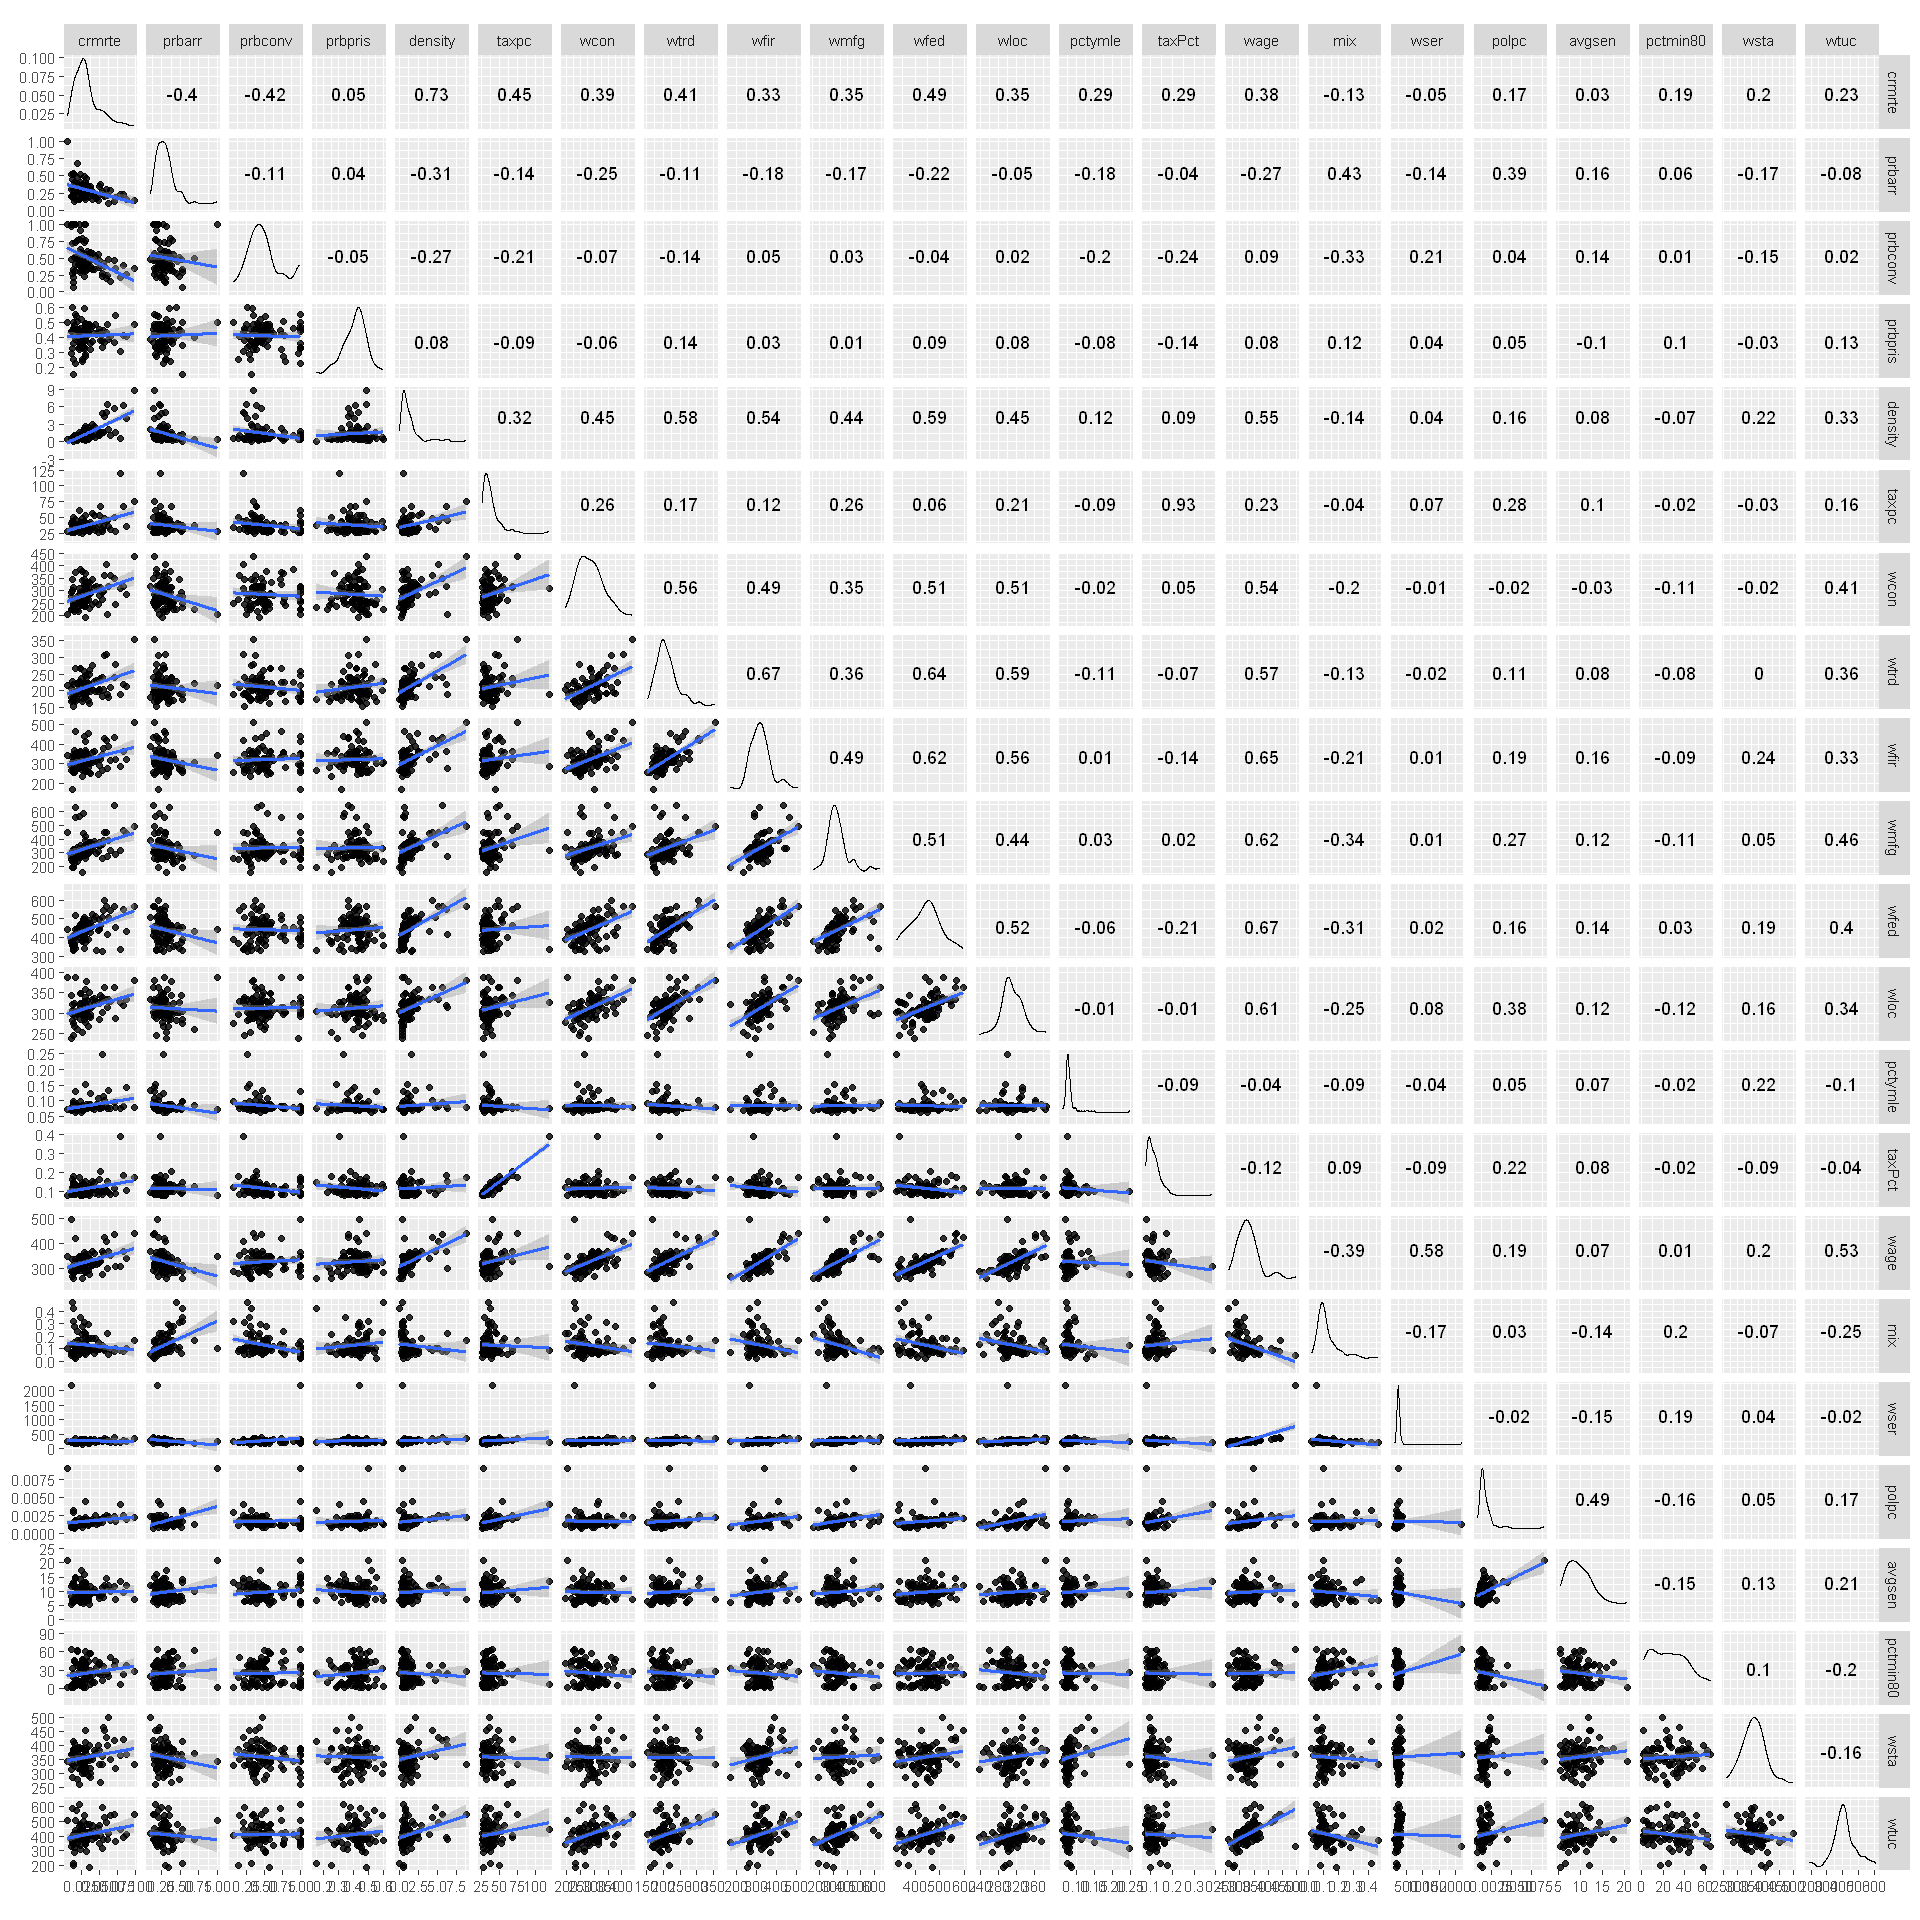

In [24]:
smoothing_method = "glm"
options(repr.plot.width=16, repr.plot.height=16)
ggscatmat(cdata[,c("crmrte", "prbarr", "prbconv", "prbpris", "density", "taxpc", "wcon", "wtrd", "wfir", "wmfg", 
                   "wfed", "wloc", "pctymle", "taxPct", "wage", "mix", "wser", "polpc",
                   "avgsen", "pctmin80", "wsta", "wtuc")], alpha=0.8) +
geom_smooth(method=smoothing_method)

#### Variable Selection

The variable selection process is based on two consecutive criteria - a degree of practical and statistical significance. After taking notes from the local law enforcement, IRS and other legislative authorities, we can narrow the list to fewer key variables, such as "prbarr", "prbconv", "density", "taxpc", "wage", "pctymle", "polpc", "pctmin80", "mix".

The chosen variables are in fact part of three different domains: Certainty of punishment - "prbarr" and "prbconv" Demographic variations - "density", "pctymle", "pctmin80" Financial standing - "taxpc", "wage"

Few variables may not play a useful role in the analysis for the following reasons

- The 'county' and 'year' variables can be ignored as those do not vary with the crime rate.
- The average sentence days ('avgsen') are determined by a long process of court trials and federally standardized protocols. Criminal activities may not be significantly motivated by the sentencing terms.
- County location alone may not be a good factor of crime rate data. Other variables like, "polpc" and "density" should be closely related with urban and rural locations. So, any information about "density" or "polpc" will be diluted as "density" has statistical significance.
- As previously discussed, all the wage variables are consolidated into one variable, "wage", since individual use of those in a model may not contribute much.

Statistical significance of these variables is analyzed as part of the model creation and EDA. Initially, independent variables will be chosen for the OLS regression, if they are significantly correlated with the dependent variable, crime rate.

#### Distribution

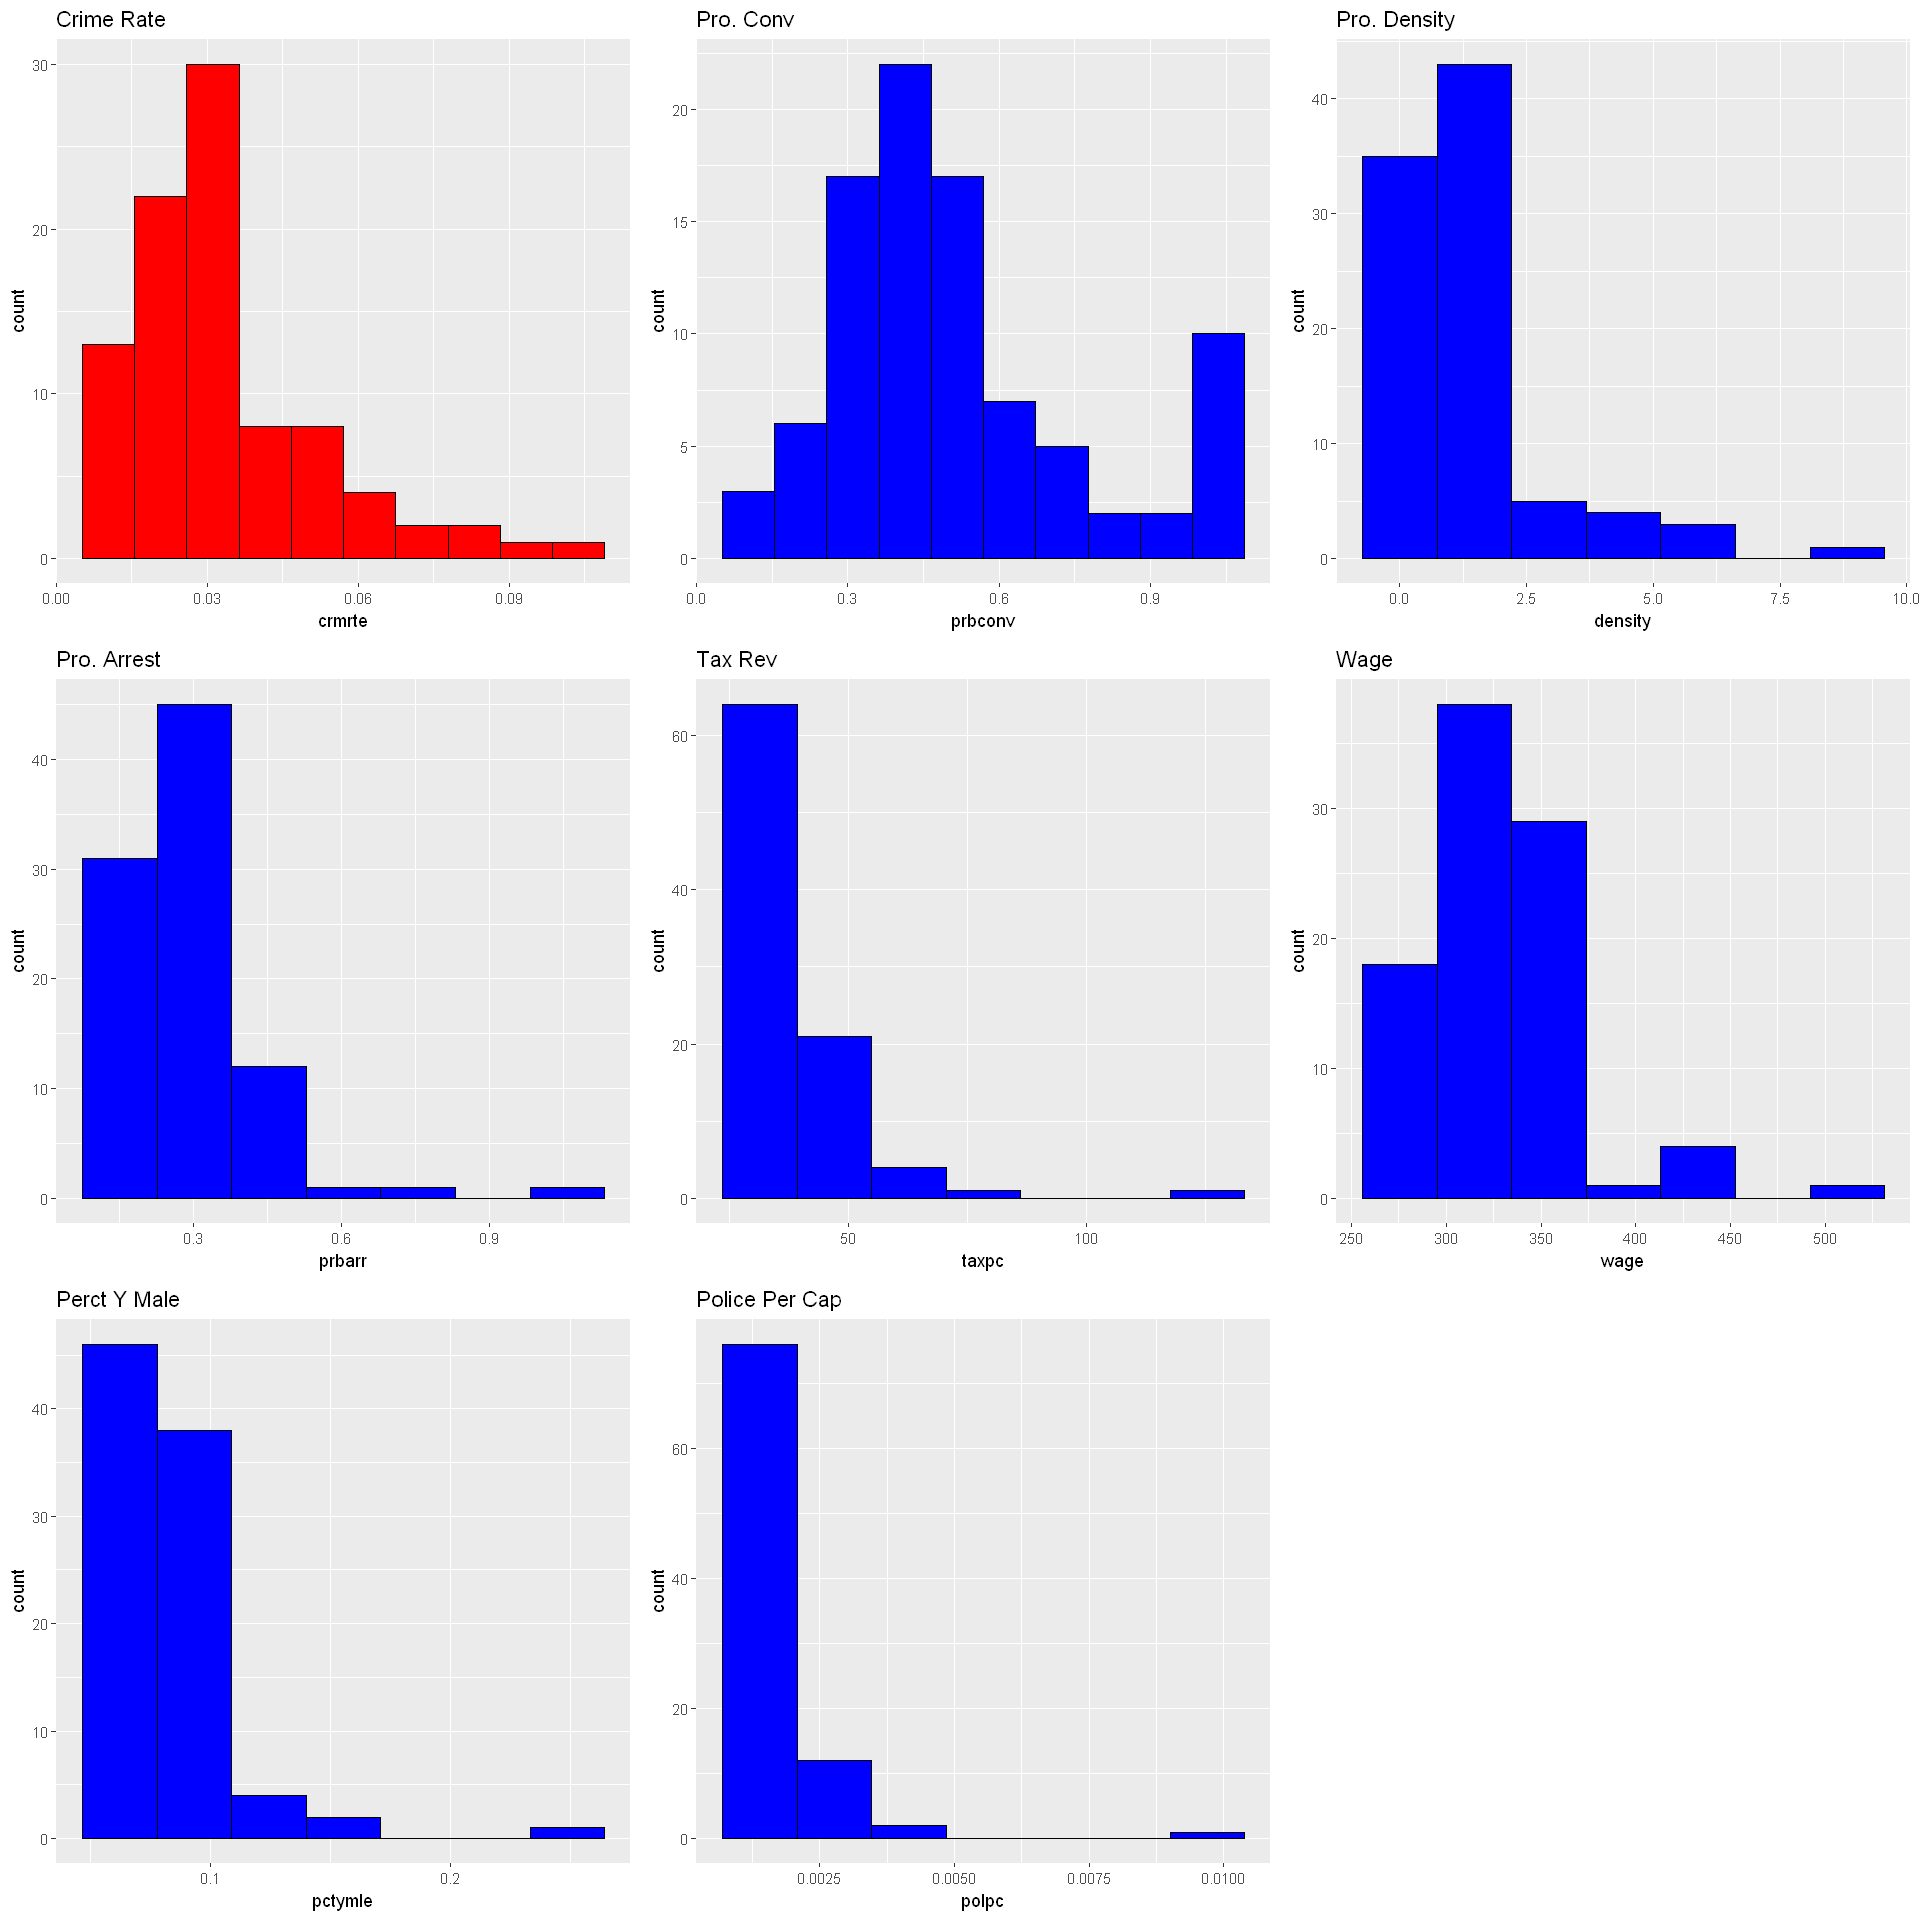

In [25]:
c <- ggplot(data=cdata, aes(crmrte)) +
    geom_histogram(bins=10, fill="red", color="black") + 
    ggtitle(paste("Crime Rate"))

cn <- ggplot(data=cdata, aes(prbconv)) +
    geom_histogram(bins=10, fill="blue", color="black") + 
    ggtitle(paste("Pro. Conv"))

dn <- ggplot(data=cdata, aes(density)) +
    geom_histogram(bins=7, fill="blue", color="black") + 
    ggtitle(paste("Pro. Density"))

ar <- ggplot(data=cdata, aes(prbarr)) +
    geom_histogram(bins=7, fill="blue", color="black") + 
    ggtitle(paste("Pro. Arrest"))

tp <- ggplot(data=cdata, aes(taxpc)) +
    geom_histogram(bins=7, fill="blue", color="black") + 
    ggtitle(paste("Tax Rev"))

wc <- ggplot(data=cdata, aes(wage)) +
    geom_histogram(bins=7, fill="blue", color="black") + 
    ggtitle(paste("Wage"))

pct <- ggplot(data=cdata, aes(pctymle)) +
    geom_histogram(bins=7, fill="blue", color="black") + 
    ggtitle(paste("Perct Y Male"))

plp <- ggplot(data=cdata, aes(polpc)) +
    geom_histogram(bins=7, fill="blue", color="black") + 
    ggtitle(paste("Police Per Cap"))

ggarrange(c, cn, dn, ar,tp, wc,pct,plp,
          ncol = 3, nrow = 3)

Although few of the distributions are skewed, taking log values did not improve any further. So, no transformation necessary.

From the Appendix - A, it is clear that applying different forms of data transformations (natural log, square, square root) did not make correlational improvements with the crime rate variable.

### Model Creation

#### Model 1 - Simple Linear Regression


Call:
lm(formula = crmrte ~ prbarr + prbconv + density + taxpc + wage + 
    pctymle, data = cdata)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.023802 -0.006283 -0.001550  0.005532  0.036629 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.537e-02  1.346e-02   1.141  0.25692    
prbarr      -2.878e-02  9.461e-03  -3.042  0.00313 ** 
prbconv     -1.791e-02  5.417e-03  -3.306  0.00139 ** 
density      6.265e-03  1.011e-03   6.199 2.03e-08 ***
taxpc        3.251e-04  9.365e-05   3.472  0.00082 ***
wage         7.989e-06  3.556e-05   0.225  0.82277    
pctymle      1.388e-01  5.118e-02   2.712  0.00810 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01065 on 84 degrees of freedom
Multiple R-squared:  0.7007,	Adjusted R-squared:  0.6793 
F-statistic: 32.77 on 6 and 84 DF,  p-value: < 2.2e-16


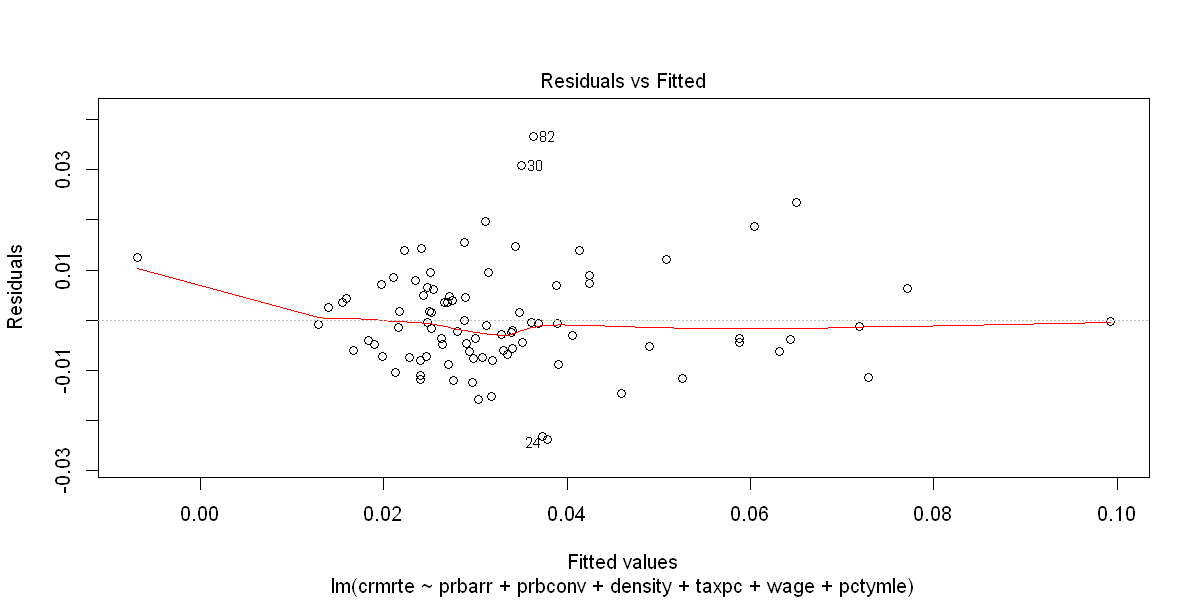

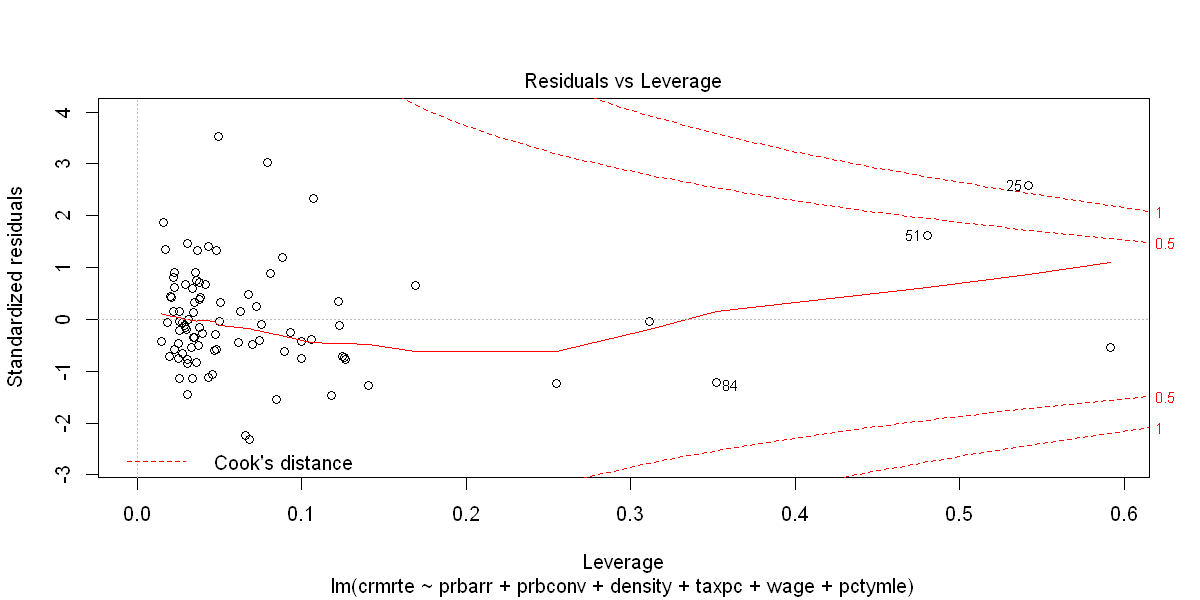

In [26]:
options(repr.plot.width=10, repr.plot.height=5)
model1 <- lm(crmrte ~  prbarr + prbconv + density + taxpc + wage + pctymle, data = cdata)
summary(model1)
plot(model1, which = 1)
plot(model1, which = 5)

In [27]:
paste("AIC Score: ", AIC(model1))
paste("Covariation of coefficients - ")
diag(vcov(model1))
paste("Mean residuals: ", mean(model1$residuals))

[1] "AIC Score:  -559.671140806715"

[1] "Covariation of coefficients - "

(Intercept)       prbarr      prbconv      density        taxpc         wage 
1.812985e-04 8.951943e-05 2.934069e-05 1.021305e-06 8.770202e-09 1.264199e-09 
     pctymle 
2.619771e-03

[1] "Mean residuals:  2.85166207566554e-19"

#### Model 1 - Interpretation 

Statistical Figures

1. Low Residuals Median: -0.002907 Mean: 2.85166207566554e-19
2. Low Coefficients and low variation of coefficients
3. Low RSE: 0.01065
4. Significantly high R-squared/Adjusted R-squared values - 0.7007, 0.6793
5. Low AIC score: -559.671140806715
6. A couple of values more than 1 cook's distance

Quality and Measurement of OLS Assumptions

- From the Fitted and Residual Plot, the spline curve shows a good alignment with the fitted line. It proves a linear relationship between dependent and independent variables. In addition, the plot does show biases as the data points are not random.
- The model efficiency is high since the coefficient variations or robust standard error values are low. It also means the estimators are consistent around the regression line.
- Except 'wage', all other variables are statistically significant with at least two stars.
- High Adjusted R-squared value implies goodness of fit.
- Two observations can be considered as outliers and those may influence the estimation.

#### Model 2 - Multiple Independent Variables

Adjustments after Model1 results - 
1. Removing two outliers 
2. Removing statistically insignificant variable, wage. 
3. Introducing new variables which have practical significance. <br>
Note - These variables have a weak correlation with other independent variables. So, it will violate the Multicollinearity.

##### Removing outliers

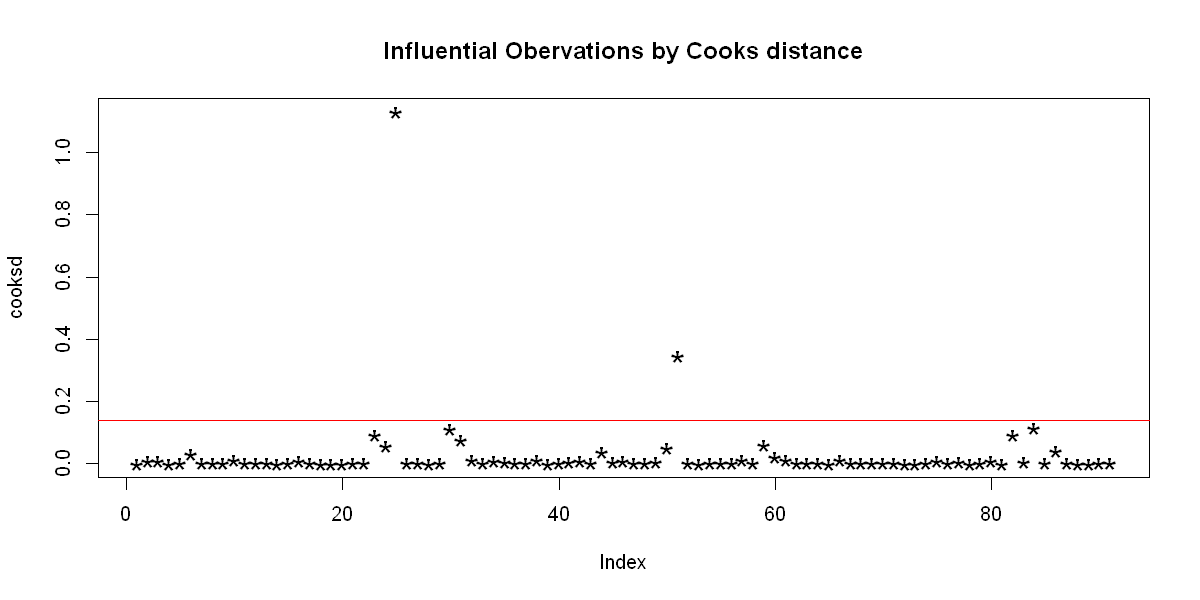

In [28]:
#Cooks distance measurement
cooksd <- cooks.distance(model1)
plot(cooksd, pch="*", cex=2, main="Influential Obervations by Cooks distance")
abline(h = 5*mean(cooksd, na.rm=T), col="red")

In [29]:
#Influential Outliers
influential <- as.numeric(names(cooksd)[(cooksd > 5*mean(cooksd, na.rm=T))])
cooksd[influential]

25        51 
1.1297046 0.3454757

In [30]:
#Remove outliers
ctdata <- cdata[(cdata$county != cdata[influential[1],]$county) & (cdata$county != cdata[influential[2],]$county),]


Call:
lm(formula = crmrte ~ prbarr + prbconv + density + taxpc + pctymle + 
    polpc + pctmin80 + mix, data = ctdata)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0199194 -0.0042765 -0.0002695  0.0047290  0.0225797 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.963e-02  7.880e-03   3.761 0.000321 ***
prbarr      -4.561e-02  1.095e-02  -4.166 7.77e-05 ***
prbconv     -2.358e-02  4.683e-03  -5.036 2.88e-06 ***
density      6.877e-03  7.772e-04   8.848 1.75e-13 ***
taxpc       -4.865e-05  1.097e-04  -0.443 0.658684    
pctymle      8.721e-02  4.120e-02   2.117 0.037402 *  
polpc        3.460e+00  1.911e+00   1.810 0.073995 .  
pctmin80     3.624e-04  5.411e-05   6.698 2.68e-09 ***
mix         -1.420e-02  1.370e-02  -1.036 0.303230    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.008235 on 80 degrees of freedom
Multiple R-squared:  0.8128,	Adjusted R-squared:  0.7941 
F-stat

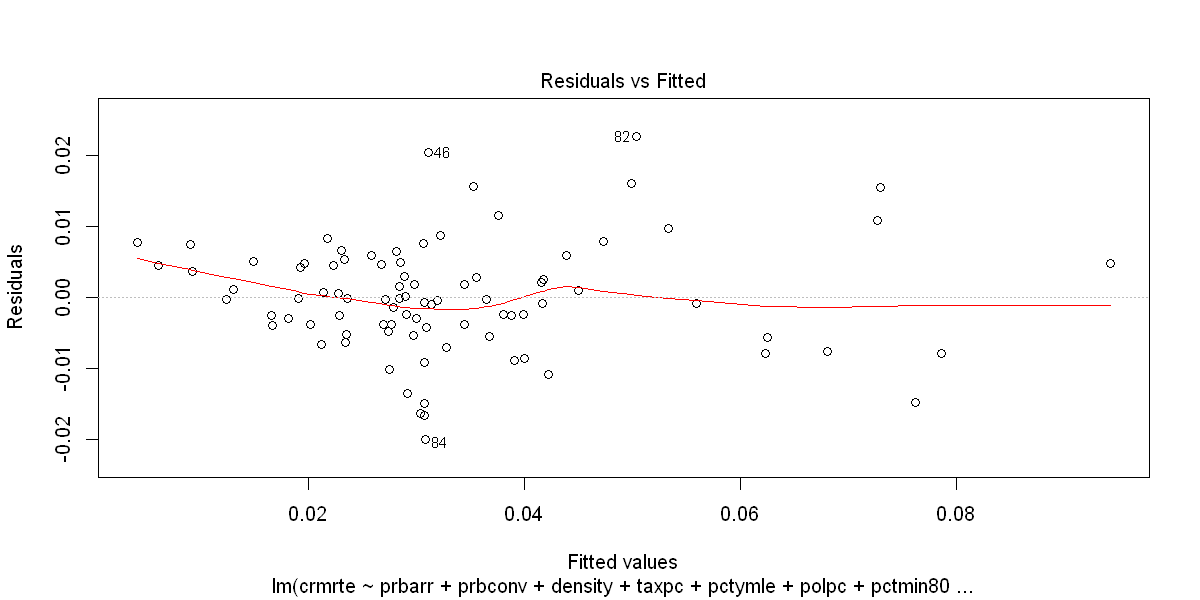

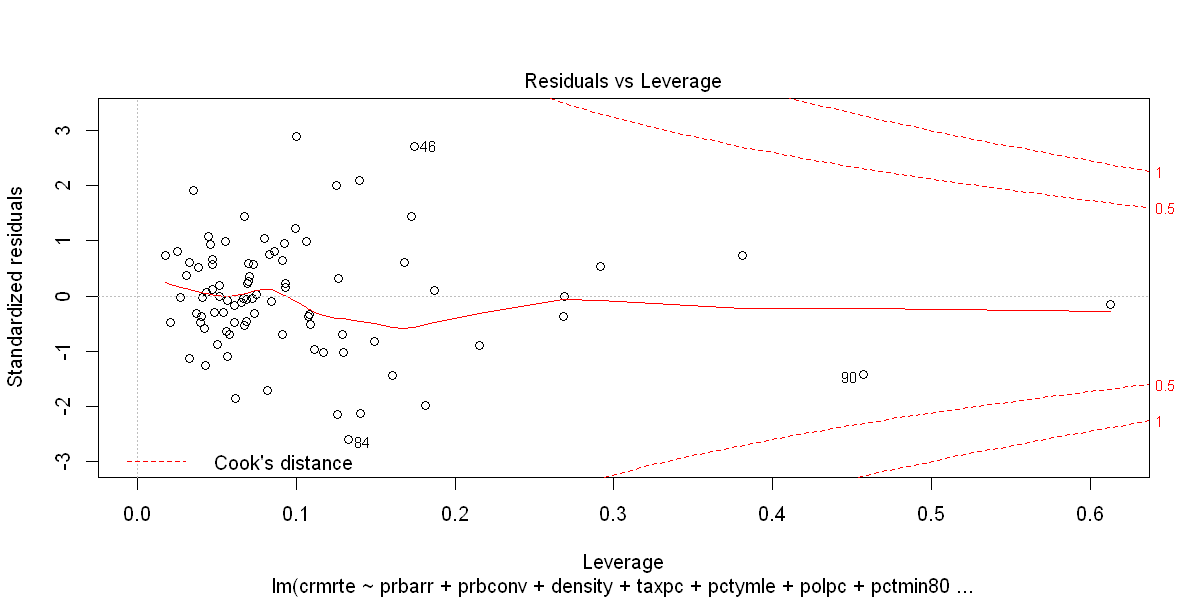

In [31]:
#Create model2
model2 <- lm(crmrte ~ prbarr + prbconv + density + taxpc + pctymle + polpc + pctmin80 + mix, data = ctdata)
summary(model2)
plot(model2, which = 1)
plot(model2, which = 5)

In [32]:
paste("AIC Score: ", AIC(model2))
paste("Covariation of coefficients - ")
diag(vcov(model2))
paste("Mean residuals: ", mean(model2$residuals))

[1] "AIC Score:  -591.204239814494"

[1] "Covariation of coefficients - "

(Intercept)       prbarr      prbconv      density        taxpc      pctymle 
6.209053e-05 1.198339e-04 2.192765e-05 6.040568e-07 1.203958e-08 1.697812e-03 
       polpc     pctmin80          mix 
3.653788e+00 2.927751e-09 1.877186e-04

[1] "Mean residuals:  -1.68519108301068e-19"

#### Model 2 - Interpretation 

Statistical Figures

1. Low Residuals 
    Median: -0.0002695
    Mean: -1.68519108301068e-19
2. Mostly low coefficients and low variation of coeffcients (except 'polpc')
3. Low RSE: 0.008235 
4. Significantly high R-squared/Adjusted R-squared values -   0.8128,  0.7941 
5. Low AIC score: -591.204239814494
7. No outliers

Quality and Measurement of OLS Assumptions

- From the Fitted and Residual Plot, the spline curve shows similar behavior as the Model1 and it still shows a sign of biases. However, the data points have become more randomly distributed.
- The model efficiency is relatively high since the coefficient variations or robust standard error values are low. It also means the estimators are consistent around the regression line.
- 'taxpc', 'polpc' and 'mix' failed to project strong statistical significance.
- High Adjusted R-squared value implies goodness of fit.
- No influencial outliers.

#### Model 3

Adjustments after Model2 results - 
1. Removing statistically insignificant variables, 'mix', 'taxpc'.
2. Since 'polpc' has potential practical significance and has a skewed distribution, taking log value and keeping as an independent variable.


Call:
lm(formula = crmrte ~ density + pctymle + prbconv + prbarr + 
    log(polpc) + pctmin80, data = ctdata)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0198864 -0.0044373 -0.0002281  0.0047602  0.0230956 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.115e-02  2.260e-02   3.591 0.000561 ***
density      6.626e-03  7.129e-04   9.296 1.86e-14 ***
pctymle      8.906e-02  3.925e-02   2.269 0.025881 *  
prbconv     -2.143e-02  4.470e-03  -4.794 7.20e-06 ***
prbarr      -4.986e-02  9.790e-03  -5.093 2.21e-06 ***
log(polpc)   7.554e-03  3.208e-03   2.354 0.020945 *  
pctmin80     3.514e-04  5.192e-05   6.768 1.80e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.008052 on 82 degrees of freedom
Multiple R-squared:  0.8166,	Adjusted R-squared:  0.8032 
F-statistic: 60.85 on 6 and 82 DF,  p-value: < 2.2e-16


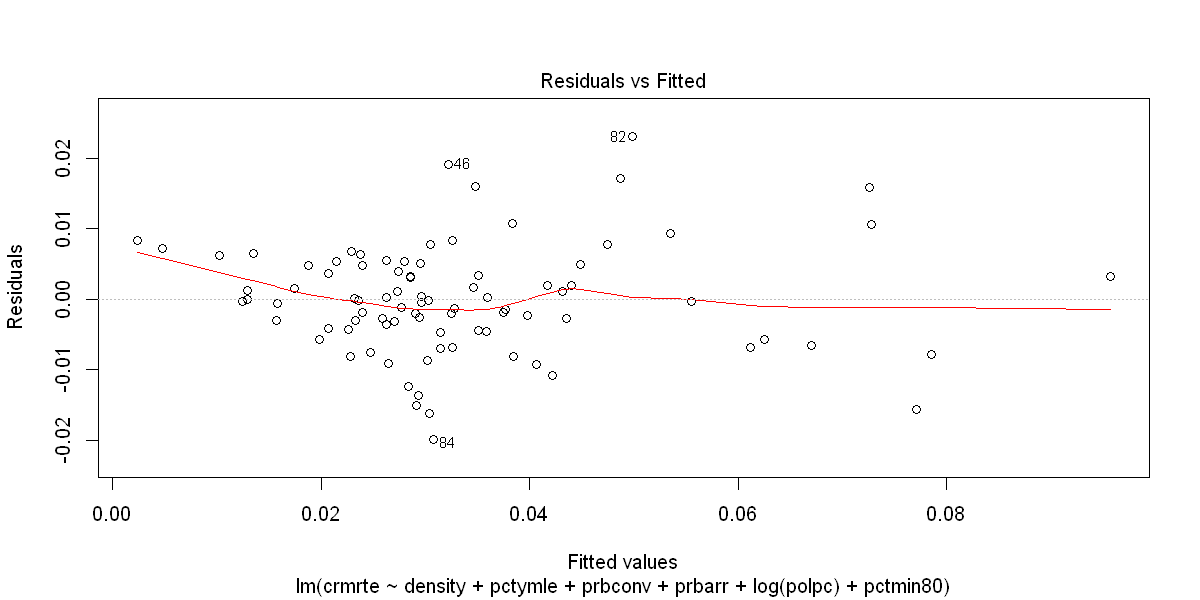

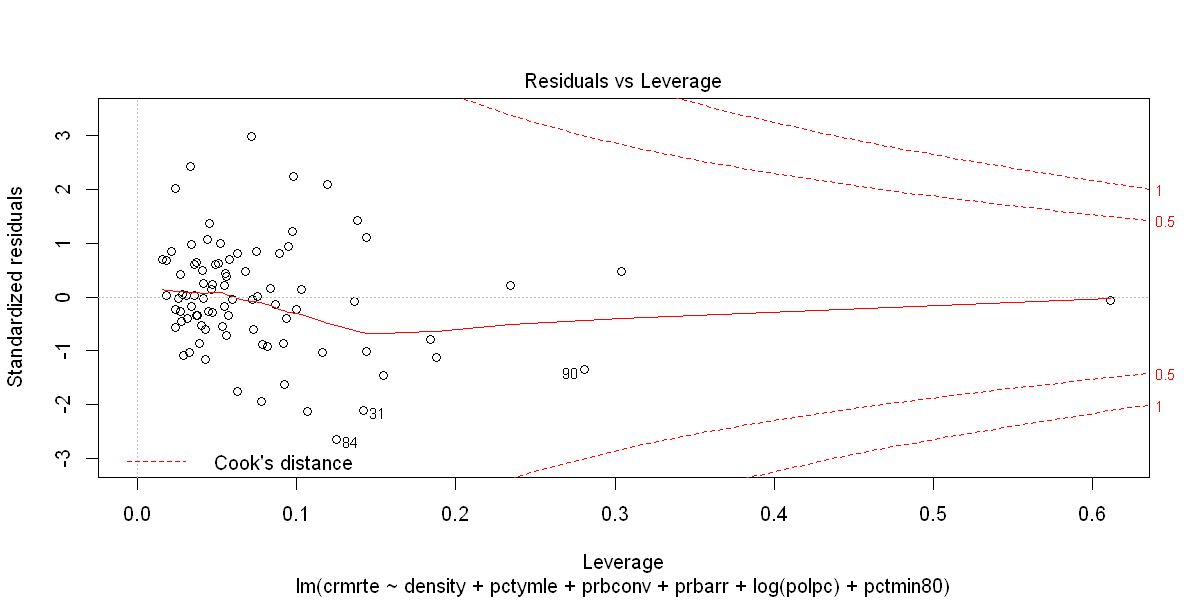

In [34]:
model3 <- lm(crmrte ~ density + pctymle + prbconv + prbarr + log(polpc) + pctmin80, data = ctdata)

summary(model3)
plot(model3, which = 1)
plot(model3, which = 5)

In [39]:
paste("AIC Score: ", AIC(model3))
paste("Covariation of coefficients - ")
diag(vcov(model3))
paste("Mean residuals: ", mean(model3$residuals))

[1] "AIC Score:  -597.014127577175"

[1] "Covariation of coefficients - "

(Intercept)      density      pctymle      prbconv       prbarr   log(polpc) 
5.108636e-04 5.081567e-07 1.540207e-03 1.997838e-05 9.583674e-05 1.029298e-05 
    pctmin80 
2.696145e-09

[1] "Mean residuals:  -2.40142168117705e-19"

#### Model 3 - Interpretation 

**Statistical Figures**

1. Very Low Residuals 
    Median: -0.0002281
    Mean:  -2.40142168117705e-19
2. Low coefficients and low variation of coefficients 
3. Low RSE: 0.008052 
4. Significantly high R-squared/Adjusted R-squared values - 0.8166, 0.8032  
5. Low AIC score: -597.014127577175 
7. No outliers

**Quality and Measurement of OLS Assumptions**

- From the Fitted and Residual Plot, the spline curve shows similar behavior as the other models. The initial curve shape should be because of less number of data points with low crime rate values. After the initial few data points, the spline curve ,in fact, becomes almost aligned with the fitted line with **random data points**. In this case, the OLS assumption **zero conditional mean** and **exogeneity** have been met.
- **Proven Multicollinearity Assumption** - OLS estimators can produce a strong linear regression model if the estimators are unbiased and not correlated to each other. The dependent variables influence each other and that positive or negative bias is captured by the error term(s). Depending on the direction of influence, if the degree of correlation is high the estimation will be overrated or underrated. The correlation numbers with the variables and residuals (APPENDIX B) proves that Multicollinearity assumption is still protected. 
- The model efficiency is relatively high since the coefficient variations or robust standard error values are still very low. It also means the estimators are consistent around the regression line.
- All the independent variables have strong statistical significance.
- High Adjusted R-squared value implies goodness of fit.
- No influncial outliers.

#### Causal Estimation

The model3 shows strong alignment with required OLS assumptions. With Zero conditional mean, exogeneity and very low residuals, the model3 seems to showing a good indication for causal estimation. However, the apparent causation could well be a lot weaker for the following reasons:
- With more data, the model robustness could easily go down. Currently, a very low number of observations (~90) are used to create the models.
- Biased sampling methods and poor data collection strategies could have a negative impact on the estimation.
- In a practical setting, it is very hard to make sure models do not have omitted variable bias. 

Finally, even if the causal estimation is hard to come by for this analysis, we can confidently conclude this is an associative model.

#### Comparing Models

In [47]:
se.model1 = sqrt(diag(vcovHC(model1)))
se.model2 = sqrt(diag(vcovHC(model2)))
se.model3 = sqrt(diag(vcovHC(model3)))

stargazer(model1, model2, model3, type = "text", omit.stat = "f",
          se = list(se.model1, se.model2),
          star.cutoffs = c(0.05, 0.01, 0.001))


                                  Dependent variable:              
                    -----------------------------------------------
                                        crmrte                     
                          (1)             (2)             (3)      
-------------------------------------------------------------------
prbarr                  -0.029         -0.046***       -0.050***   
                        (0.016)         (0.011)         (0.010)    
                                                                   
log(polpc)                                              0.008*     
                                                        (0.003)    
                                                                   
prbconv                 -0.018*        -0.024***       -0.021***   
                        (0.008)         (0.006)         (0.004)    
                                                                   
density                0.006***        0.007***

From the model interpretation and this comparison table, it is obvious that the model3 has a lower standard error and higher Adjusted R-squared values. In addition, from the residual and fitted plot, the model3 shows good efficiency and consistency.

### Proposed Policy Changes

Since 'Probability of Arrest', 'Probability of Conviction' and 'Density' have a major contribution for the model3, following legislative actions can be taken to mitigate the crime rates.

- A legislative agenda about lower tolerance level for criminal activities should have a major impact on a number of criminal cases.
- More surveillance activities in densely populated areas are necessary to reduce crime rates.
- A series of public circulations on stricter policies which is targetted towards specific demographics should have a greater impact.  

### Appendix - A
Compare Corr for Different Transformation with Crime Rate

In [4]:
getLogTran <- function(df, cols, tranType, tranTypeDep){
    corList <- list()
    
    for(coln in cols){
               
        if(tranType == ''){
          corList <- append(corList, cor(df[[coln]], tranVar(df$crmrte, tranTypeDep)))   
            
        }else{
            
          newColN <- paste(coln, tranType, sep="_")
          df[[newColN]] <- tranVar(df[[coln]], tranType)    
          corList <- append(corList, cor(df[[newColN]], tranVar(df$crmrte, tranTypeDep)))              
      }        
        
    }
    
    return (corList)
}
    
tranVar <- function(var1, tranType){
    if(tranType == 'lg'){
        return (log(var1))
    } else if(tranType == 'sq'){
        return (var1^2)
    } else if(tranType == 'sqt'){
        return (sqrt(var1))
    } else {
        return (var1)
    }
}

In [15]:


#tdata <- data.frame(matrix(ncol = 12, nrow = 0))
cols <- c("crmrte", "prbarr", "prbconv", "density", "taxpc", "wage", "pctymle")
#colnames(tdata) <- cols

#for(ops in c('', 'lg', 'sq', 'sqt')){
print('------------------Corr with Crime Rate. No trans of crmrte---------------------')
   
list_data <- list(cols, getLogTran(cdata, cols, 'lg', ''), 
                  getLogTran(cdata, cols, 'sq', ''), getLogTran(cdata, cols, 'sqt', ''), getLogTran(cdata, cols, '', ''))

tdata  <-  as.data.frame(matrix(unlist(list_data), nrow=length(unlist(list_data[1]))))
colnames(tdata) <- c("var", "lg", "sq", "sqt", "none")
tdata

print('------------------Corr with Crime Rate. Log trans of crmrte---------------------')

list_data <- list(cols, getLogTran(cdata, cols, 'lg', 'lg'), 
                  getLogTran(cdata, cols, 'sq', 'lg'), 
                  getLogTran(cdata, cols, 'sqt', 'lg'), 
                  getLogTran(cdata, cols, '', 'lg'))

tdata  <-  as.data.frame(matrix(unlist(list_data), nrow=length(unlist(list_data[1]))))
colnames(tdata) <- c("var", "lg", "sq", "sqt", "none")
tdata

print('------------------Corr with Crime Rate. Square Trans of crmrte---------------------')


list_data <- list(cols, getLogTran(cdata, cols, 'lg', 'sq'), 
                  getLogTran(cdata, cols, 'sq', 'sq'), 
                  getLogTran(cdata, cols, 'sqt', 'sq'), 
                  getLogTran(cdata, cols, '', 'sq'))

tdata  <-  as.data.frame(matrix(unlist(list_data), nrow=length(unlist(list_data[1]))))
colnames(tdata) <- c("var", "lg", "sq", "sqt", "none")
tdata

print('------------------Corr with Crime Rate. SQRT Trans of crmrte---------------------')


list_data <- list(cols, getLogTran(cdata, cols, 'lg', 'sqt'), 
                  getLogTran(cdata, cols, 'sq', 'sqt'), 
                  getLogTran(cdata, cols, 'sqt', 'sqt'), 
                  getLogTran(cdata, cols, '', 'sqt'))

tdata  <-  as.data.frame(matrix(unlist(list_data), nrow=length(unlist(list_data[1]))))
colnames(tdata) <- c("var", "lg", "sq", "sqt", "none")
tdata


[1] "------------------Corr with Crime Rate. No trans of crmrte---------------------"


var,lg,sq,sqt,none
crmrte,0.94155941652815,0.963314447688739,0.986585485007721,1
prbarr,-0.419670932952259,-0.33750871021838,-0.414702800613676,-0.398879118076819
prbconv,-0.35418173866631,-0.417079154924082,-0.398569393501294,-0.417302576248551
density,0.477607761812432,0.660066274500242,0.733462985063669,0.728963158061984
taxpc,0.415564519823015,0.44182777372935,0.437572604049532,0.4509797818509
wage,0.386374319390269,0.359104947366975,0.382066158175715,0.376101960332975
pctymle,0.324972570053244,0.245450825730505,0.310144690951903,0.291248491056166


[1] "------------------Corr with Crime Rate. Log trans of crmrte---------------------"


var,lg,sq,sqt,none
crmrte,1,0.82581808440035,0.983402742416995,0.94155941652815
prbarr,-0.431410316712002,-0.459855111060795,-0.454101251802571,-0.468403863932953
prbconv,-0.341139648543617,-0.472928942629082,-0.406452145832728,-0.444316373057585
density,0.493596527034902,0.520974596124295,0.68110686628769,0.633650441803765
taxpc,0.341856418221085,0.344572481500381,0.354361129677032,0.360050785795018
wage,0.332769071484339,0.283661814996677,0.322794556355104,0.311251670277
pctymle,0.31242104733822,0.235794389929685,0.297335385260795,0.27888339420391


[1] "------------------Corr with Crime Rate. Square Trans of crmrte---------------------"


var,lg,sq,sqt,none
crmrte,0.82581808440035,1,0.908891866329352,0.963314447688739
prbarr,-0.393571355383632,-0.263180713034383,-0.374534525713388,-0.344704537711208
prbconv,-0.334557367523137,-0.347166049638351,-0.361399267209415,-0.366043379028041
density,0.425754280086151,0.739296908890496,0.717924635162036,0.753822678425409
taxpc,0.453149701355062,0.494619036717848,0.48110566503104,0.499453249054686
wage,0.388999478908761,0.381724124434679,0.389602617479143,0.388648930815095
pctymle,0.294385229646093,0.217595054143318,0.280503978888829,0.262378460036068


[1] "------------------Corr with Crime Rate. SQRT Trans of crmrte---------------------"


var,lg,sq,sqt,none
crmrte,0.983402742416995,0.908891866329352,1,0.986585485007721
prbarr,-0.427248888625485,-0.391120619995217,-0.434215188985925,-0.431107672375324
prbconv,-0.352044843027956,-0.44898794245525,-0.407197939732133,-0.43541429509193
density,0.493488003542832,0.597989175801448,0.718591754803244,0.691747794431379
taxpc,0.382756178938766,0.398040449985126,0.400385015589278,0.410210182611733
wage,0.368151444712786,0.329289255681376,0.36089293087517,0.351987512269128
pctymle,0.325431491130904,0.246550698458356,0.310362612665254,0.291511539640238


### Appindex - B

In [41]:
cov(model3$residuals,ctdata$density)
cov(model3$residuals,ctdata$pctymle)
cov(model3$residuals,ctdata$prbconv)
cov(model3$residuals,ctdata$prbarr)
cov(model3$residuals,log(ctdata$polpc))
cov(model3$residuals,ctdata$pctmin80)

[1] -7.141486e-20

[1] -1.752034e-21

[1] -6.84334e-20

[1] 6.135469e-20

[1] 3.076209e-20

[1] 8.046409e-18